In [1]:
import pandas as pd
import numpy as np
# Импортируем библиотеку scipy для Т-тест Стьюдента
from scipy import stats as st

# Импортируем метод Мана-Уитни
from scipy.stats import mannwhitneyu

# Регулярные выражения
import re

# Стоп-слова
from nltk.corpus import stopwords

# Лемматизация
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer

# Импортируем библиотеку для разбиения данных на тренировочные и тестовые
from sklearn.model_selection import train_test_split

# Логистическая регрессия
from sklearn.linear_model import LogisticRegression

# Матрица неточности
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('video_games_sales.csv')
data

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,55788,Indivisible,indivisible,Role-Playing,NaN,PC,505 Games,Lab Zero Games,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224682/indivisibl...,1,NaN,/games/boxart/full_6339426AmericaFrontccc.jpg
55788,55789,Lost Ember,lost-amber,Adventure,RP,PC,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/games/game.php?id=2246...,1,NaN,/games/boxart/full_8893129AmericaFrontccc.jpg
55789,55790,Lost Ember,lost-amber,Adventure,RP,PS4,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224690/lost-ember...,1,NaN,/games/boxart/full_6514293AmericaFrontccc.jpg
55790,55791,Lost Ember,lost-amber,Adventure,RP,XOne,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224688/lost-ember...,1,NaN,/games/boxart/full_6799693AmericaFrontccc.jpg


In [3]:
sport = data[data['Genre']=='Sports'].Critic_Score.dropna()

other = data[data['Genre']!='Sports'].Critic_Score.dropna()

#### Как критики относятся к спортивным играм?

H0: Критики относятся к спортивным играм так же как и к другим играм

Н1: Критики относятся к спортивным играм иначе

<AxesSubplot:>

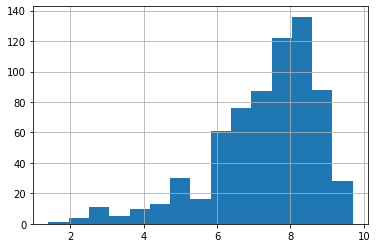

In [4]:
sport.hist(bins = 15)

<AxesSubplot:>

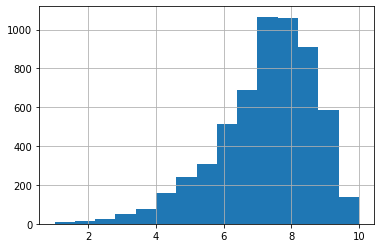

In [5]:
other.hist(bins = 15)

In [6]:
# Используем U-тест Манна-Уитни из-за неравномерного распределения выборки

# Уровень значимости
alpha = 0.05

stat, p = mannwhitneyu(sport, other)
print('Statistics = %.1f, p = %.3f' % (stat, p))

Statistics = 1910301.5, p = 0.015


Значение p-value < alpha, мы принимает альтернативную гипотизу. Критики относятся к спортивным играм лучше чем к другим.

#### Критикам нравятся больше игры на PC или на PS4?

H0: Критики любят и PC и PS4.

Н1: Критики любят PC больше, чем PS4

In [7]:
PS = data[data['Platform']=='PS'].Critic_Score.dropna()
PS4 = data[data['Platform']=='PS4'].Critic_Score.dropna()

In [8]:
# Используем Т-тест Стьюдента
result = st.ttest_ind(PS, PS4, equal_var=False)
print(result)

if (result.statistic > 0) & (result.pvalue / 2 < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Принимаем нулевую гипотизу')

Ttest_indResult(statistic=-4.391707738563402, pvalue=1.6616021053860605e-05)
Принимаем нулевую гипотизу


#### Критикам больше нравятся стрелялки или стратегии?

H0: Критикам нравятся и стрелялки и стратегии.

Н1: Критики любят больше стратегии, чем стрелялки.

In [9]:
Shooter = data[data['Genre']=='Shooter'].Critic_Score.dropna()
Strategy = data[data['Genre']=='Strategy'].Critic_Score.dropna()

In [10]:
print(f'Shooter {round(Shooter.mean(),2)}')

print(f'Strategy {round(Strategy.mean(),2)}')

Shooter 7.29
Strategy 7.43


In [11]:
# Используем Т-тест Стьюдента
result = st.ttest_ind(Shooter, Strategy, equal_var=False)
print(result)

if (result.statistic < 0) & (result.pvalue / 2 < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Принимаем нулевую гипотизу')

Ttest_indResult(statistic=-1.6073949711166526, pvalue=0.10838786414223071)
Принимаем нулевую гипотизу


### Задание 2

In [12]:
spam = pd.read_csv('spam.csv')
spam

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
def message_lower(row):
  
    # Приводим текст к нижнему регистру
    lower_case = row.lower()
    
    # Удаляем мусорные символы
    words = re.sub(r'[\W_]+',' ', lower_case)
    
    # Разбиваем текст    
    splitted = words.split()
    
    # Удаляем стоп слова   
    stopwords_set = set(stopwords.words('english'))
    without_sw = [word for word in splitted if word not in stopwords_set]
    
    # Лемматизация
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized_text = [wordnet_lemmatizer.lemmatize(word) for word in without_sw]
    
    # Возвращаем строку
    message = ' '.join(map(str, lemmatized_text))
    
    return message

In [14]:
spam['Message'] = spam['Message'].apply(message_lower)
spam

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though
...,...,...
5567,spam,2nd time tried 2 contact u u 750 pound prize 2...
5568,ham,ü b going esplanade fr home
5569,ham,pity mood suggestion
5570,ham,guy bitching acted like interested buying some...


In [15]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(spam.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray())

In [16]:
tfidf_matrix

,0,1,2,3,4,5,6,7,8,9,...,8038,8039,8040,8041,8042,8043,8044,8045,8046,8047
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, spam['Category'], test_size=0.3, random_state = 42)

# Обращаемся к классу LogisticRegression() и записываем его в переменную model
model = LogisticRegression(random_state = 42)

# Тренируем нашу модель 
model.fit(X_train, y_train)

# делаем прогноз на тестовой выборке
y_pred = model.predict(X_test)

# Матрица неточности
print('Матрица неточности:') 
print(confusion_matrix(y_test, y_pred, labels=['ham', 'spam']))

Матрица неточности:
[[1445    3]
 [  66  158]]


Матрица показывает хороший результат. 66 раз ошибился и предсказал, что 'ham' это спам. 3 раза ложных отрицания.

In [18]:
spam['Fact'] = pd.DataFrame(y_test)
spam['Prediction'] = pd.DataFrame(y_pred)
resalt = spam[spam.Fact != spam.Prediction]
resalt.drop(['Category'], axis=1).dropna()

,Message,Fact,Prediction
8,winner valued network customer selected receiv...,spam,ham
12,urgent 1 week free membership 100 000 prize ja...,spam,ham
15,xxxmobilemovieclub use credit click wap link n...,spam,ham
17,eh u remember 2 spell name yes v naughty make ...,ham,spam
19,england v macedonia dont miss goal team news t...,spam,ham
...,...,...,...
1544,hello orange 1 month free access game news spo...,spam,ham
1564,get ready put excellent sub face,ham,spam
1583,yep derek house see sunday lt 3,ham,spam
1598,urgent mobile number awarded 2000 prize guaran...,spam,ham
